In [3]:
import seaborn
from flask_ood.viz.ParityPlot import OODParityPlot, DensityOODParityPlot, HoFOODParityPlot, AlphaOODParityPlot, CvOODParityPlot, GapOODParityPlot
from flask_ood.viz.ParityPlot import HomoOODParityPlot, LumoOODParityPlot, MuOODParityPlot, R2OODParityPlot, ZpveOODParityPlot
from functools import partial
import numpy as np

In [12]:
def plot_results_molformer(target,plotter,is_pretrained):
    """
    Reproduce plot only with pre-existing results.
    """
    assert target in [
        "10k_dft_density",
        "10k_dft_hof",
        "qm9_alpha",
        "qm9_cv",
        "qm9_gap",
        "qm9_homo",
        "qm9_lumo",
        "qm9_mu",
        "qm9_r2",
        "qm9_zpve"
    ], "target_value must be either '10k_dft_density', '10k_dft_hof', 'qm9_alpha','qm9_cv', 'qm9_gap', 'qm9_homo', 'qm9_lumo', 'qm9_mu', 'qm9_r2', or 'qm9_zpve'. 'g298', 'h298', 'u0' and 'u298' are currently not supported."
    prop_name=target.replace('10k_dft_','')
    if(is_pretrained):
        pred_iid_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_w_pretrain_CUDA/{prop_name}/iid_test_preds.txt")
        real_iid_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_w_pretrain_CUDA/{prop_name}/iid_test_actuals.txt")
        pred_ood_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_w_pretrain_CUDA/{prop_name}/ood_test_preds.txt")
        real_ood_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_w_pretrain_CUDA/{prop_name}/ood_test_actuals.txt")
    else:
        pred_iid_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_no_pretrain_CUDA/{prop_name}/iid_test_preds.txt")
        real_iid_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_no_pretrain_CUDA/{prop_name}/iid_test_actuals.txt")
        pred_ood_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_no_pretrain_CUDA/{prop_name}/ood_test_preds.txt")
        real_ood_vals=np.loadtxt(f"./checkpoints/checkpoints_{target}_OOD_no_pretrain_CUDA/{prop_name}/ood_test_actuals.txt")
    
    true_labels = {
        "iid": real_iid_vals,
        "ood": real_ood_vals,
    }

    fake_labels = {
        "iid": pred_iid_vals,
        "ood": pred_ood_vals,
    }
    if(is_pretrained):
        fig = plotter(true_labels, fake_labels, title=target, model_name="Pretrained MoLFormer")
        fig.savefig(f"./results/Pretrained_{target}_parity_plot.png")
    else:
        fig = plotter(true_labels, fake_labels, title=target, model_name="Scratch MoLFormer")
        fig.savefig(f"./results/Scratch_{target}_parity_plot.png")   

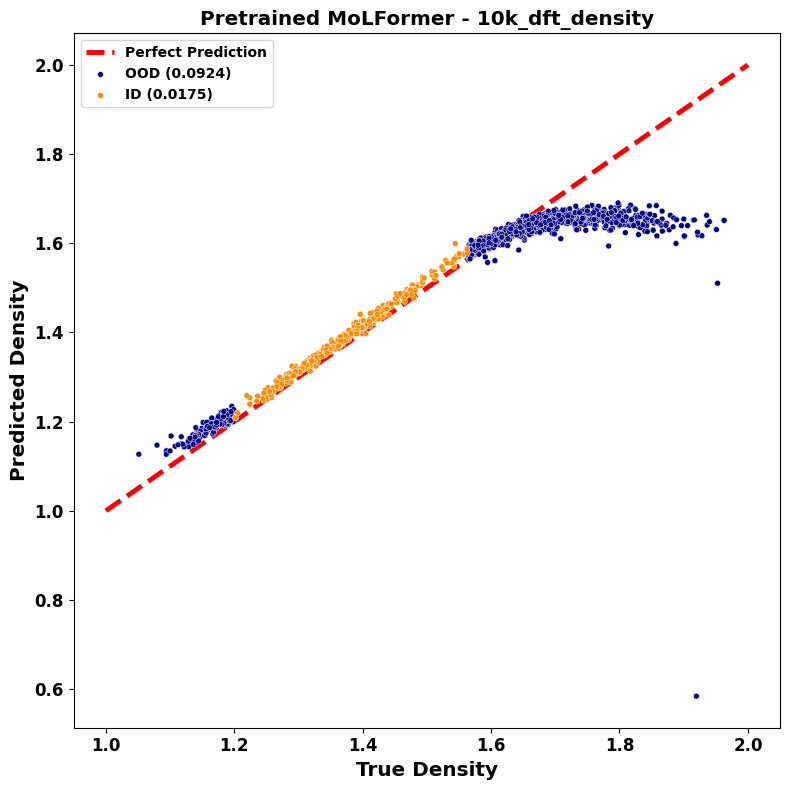

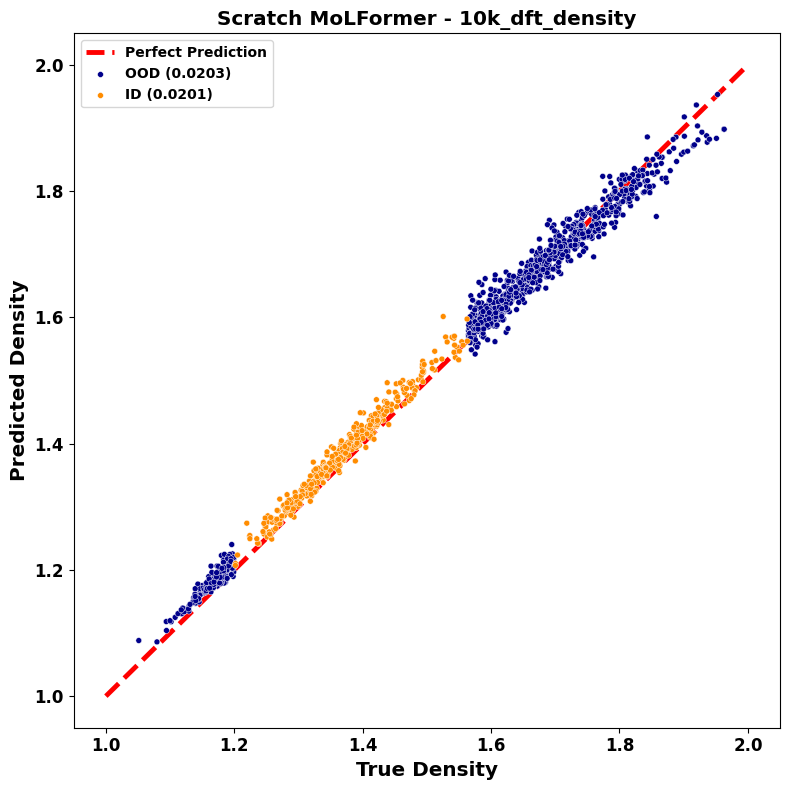

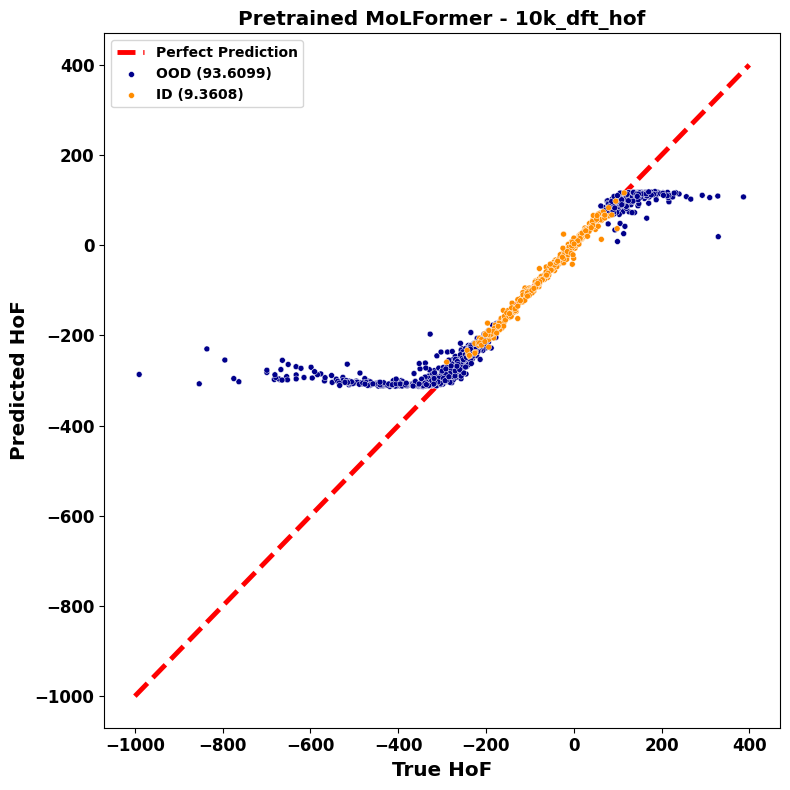

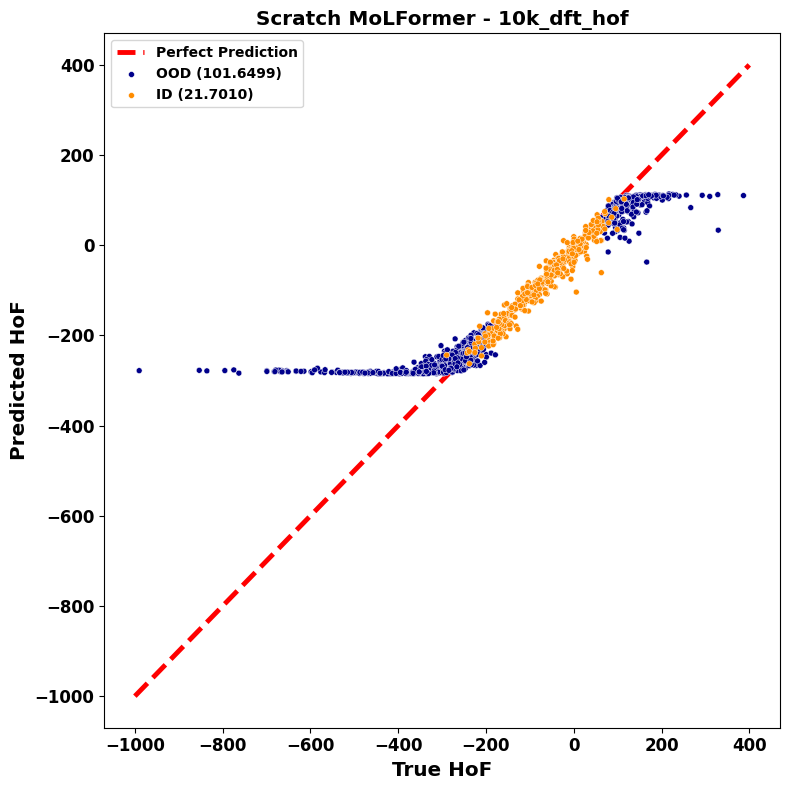

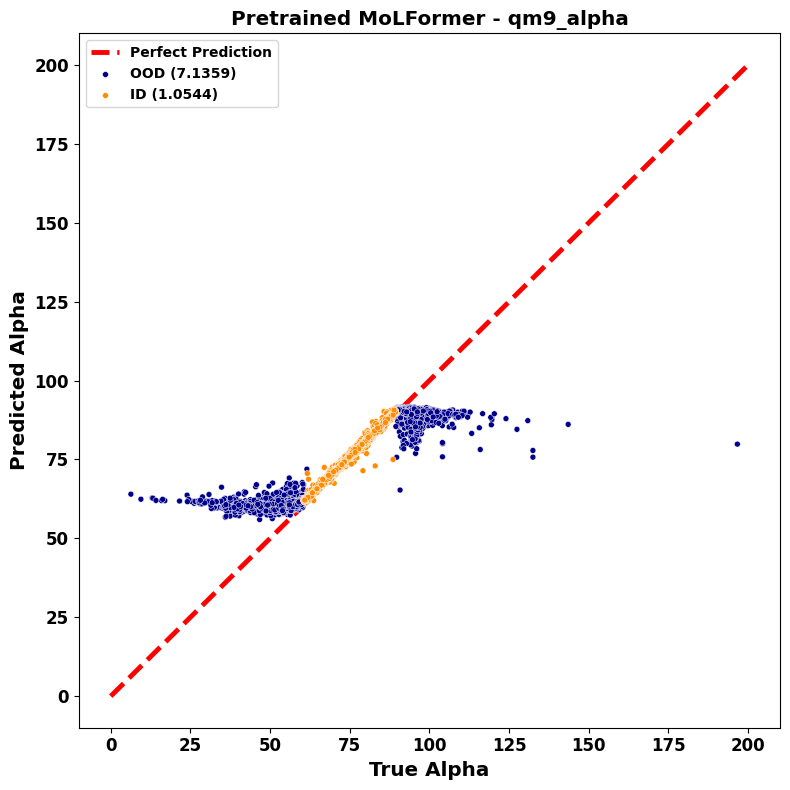

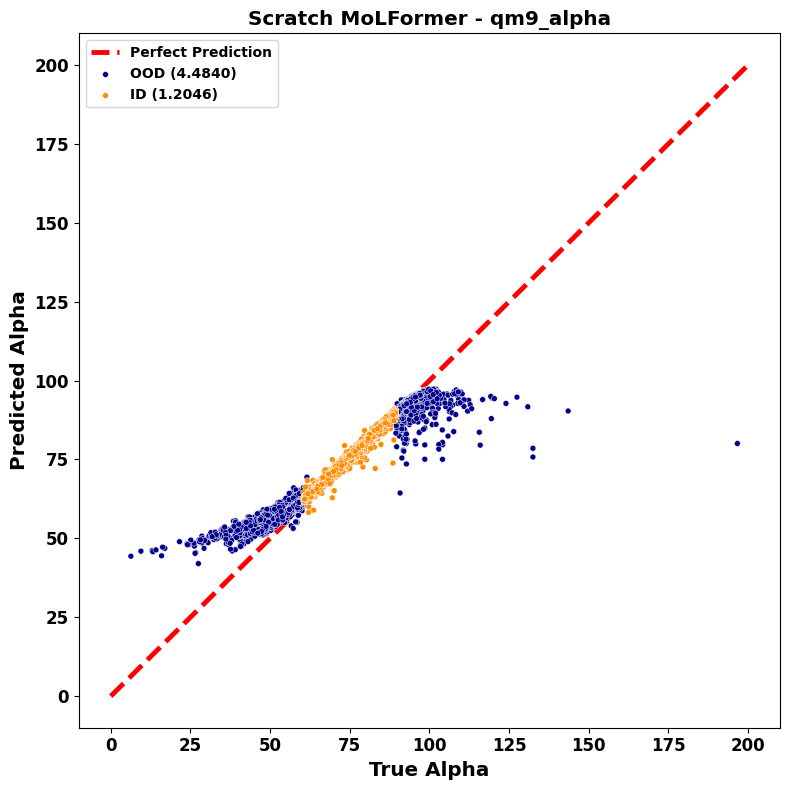

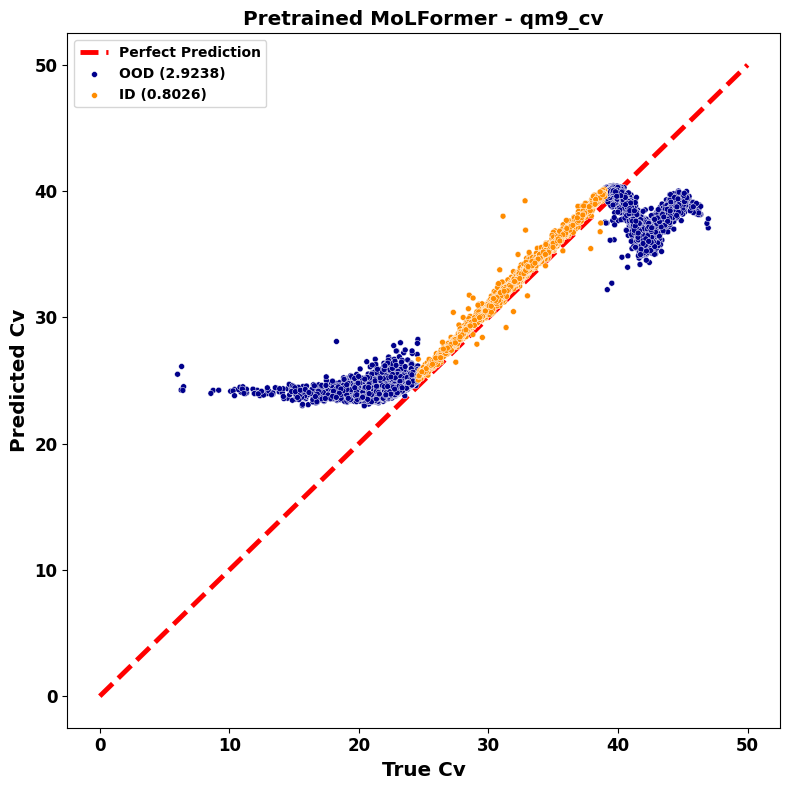

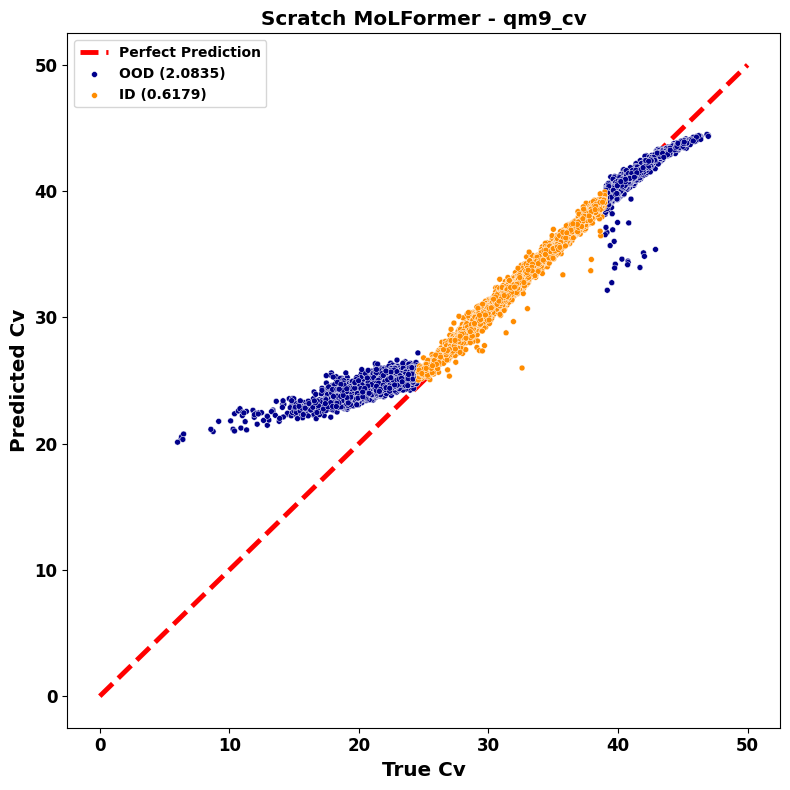

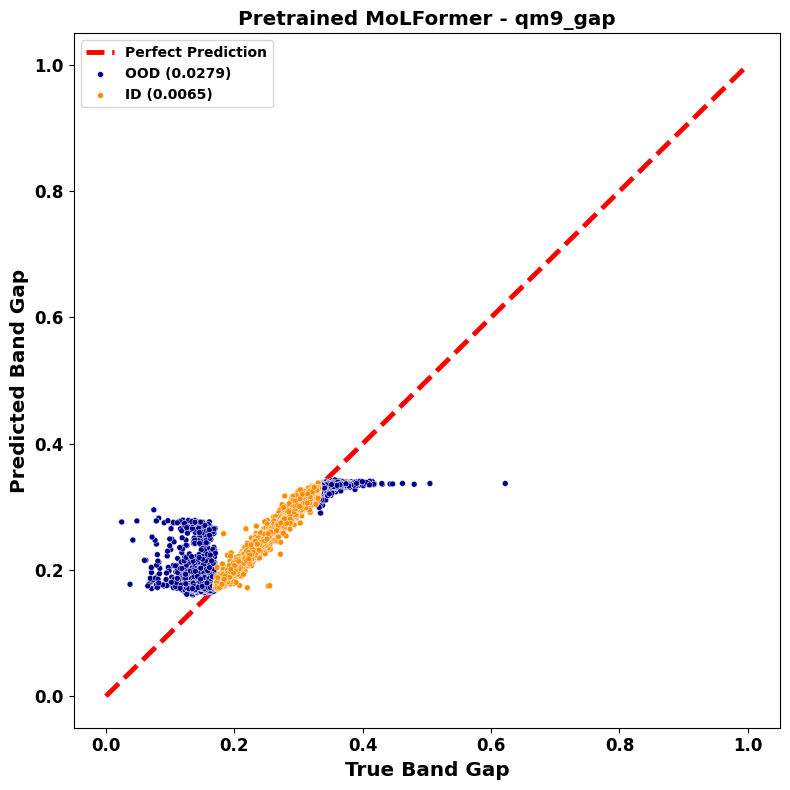

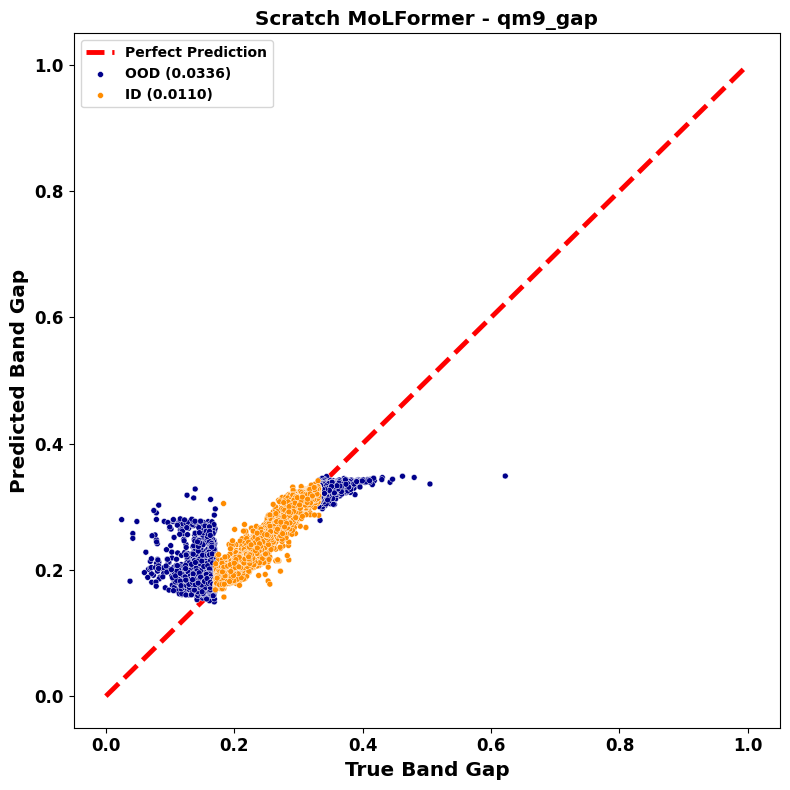

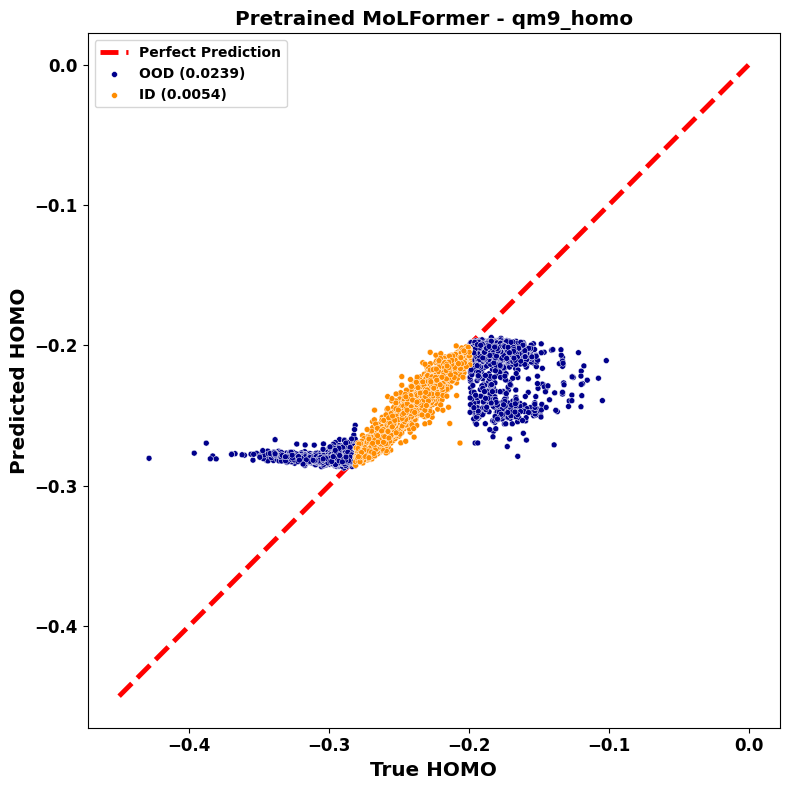

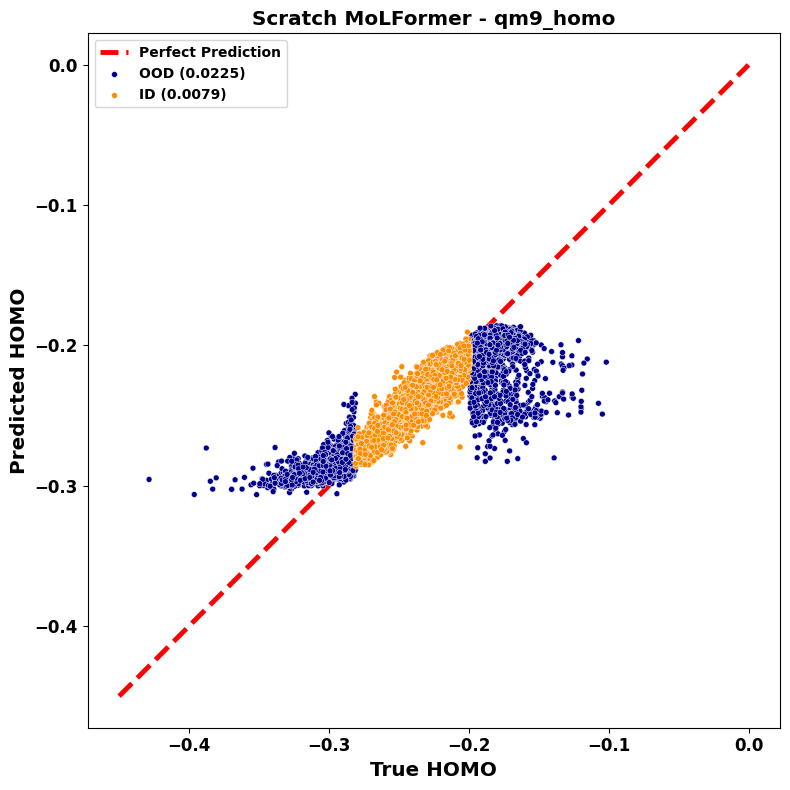

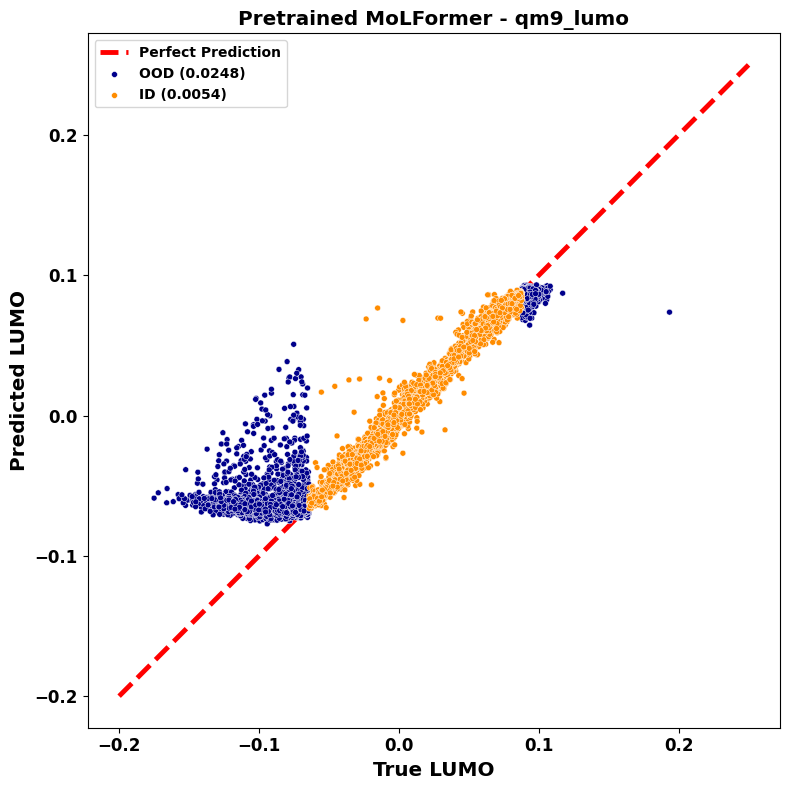

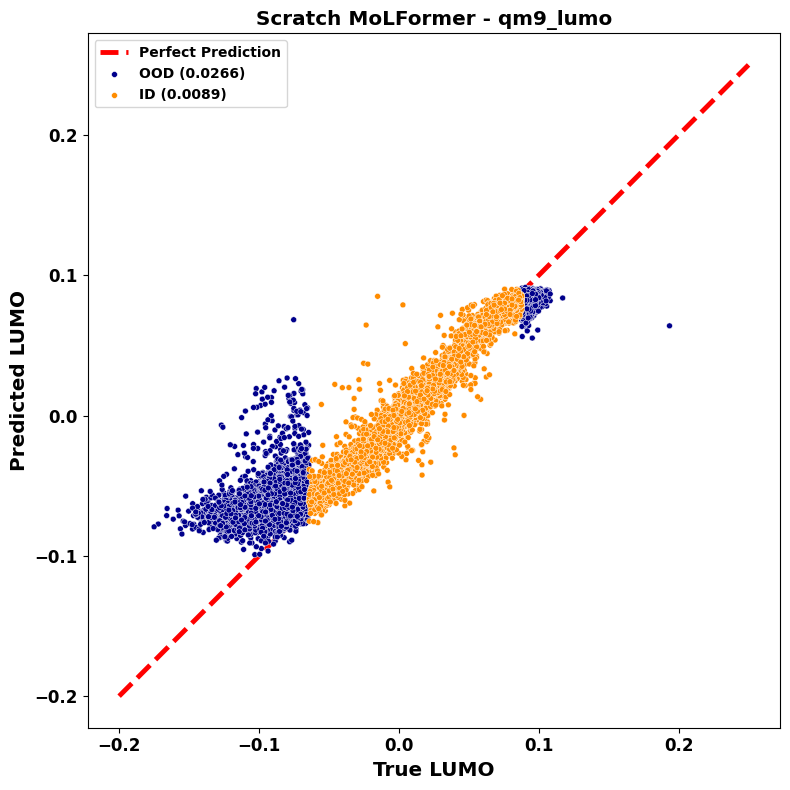

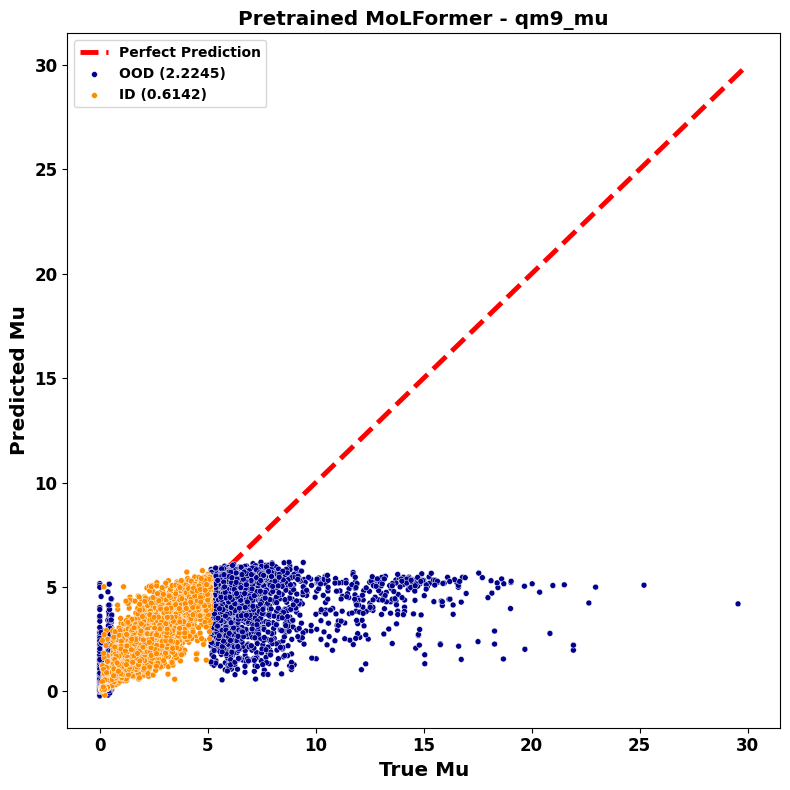

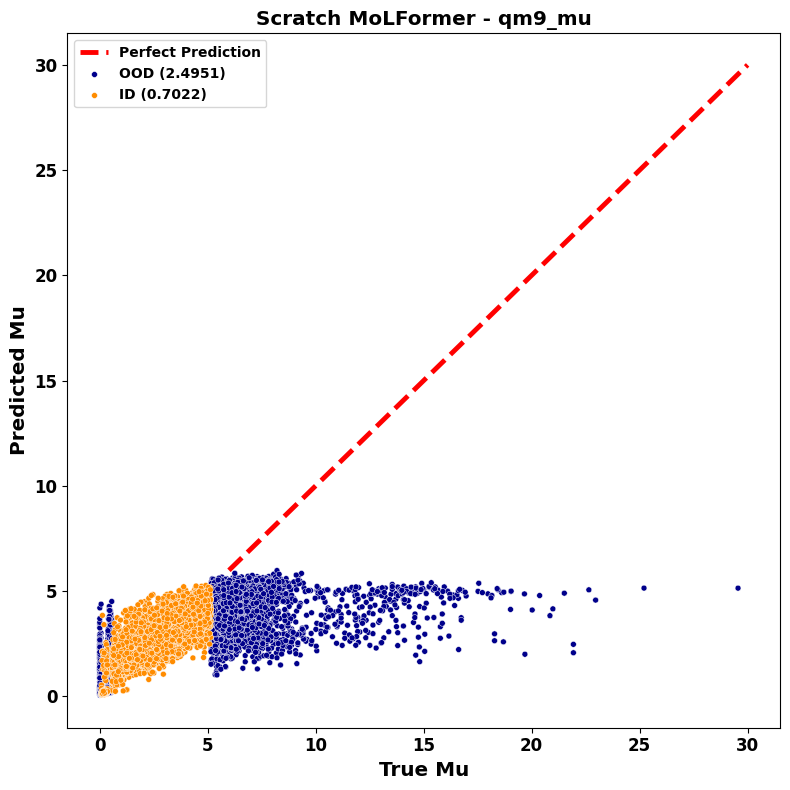

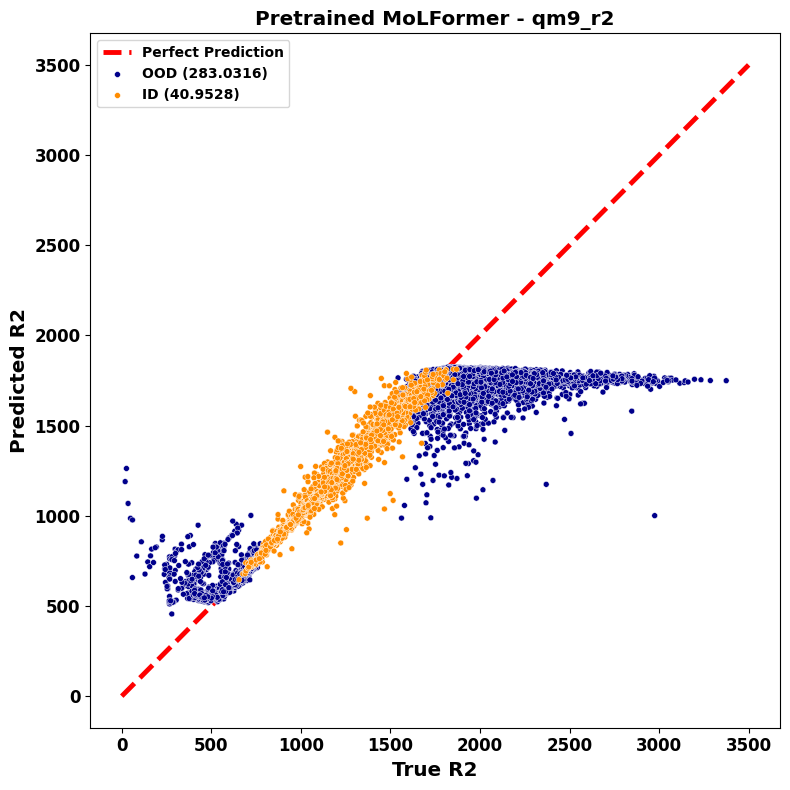

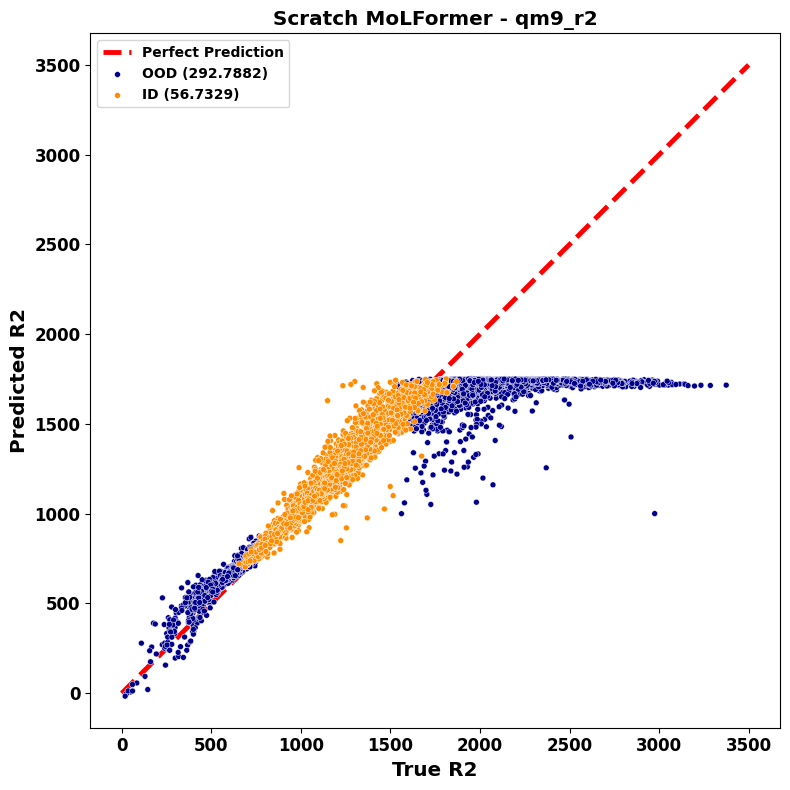

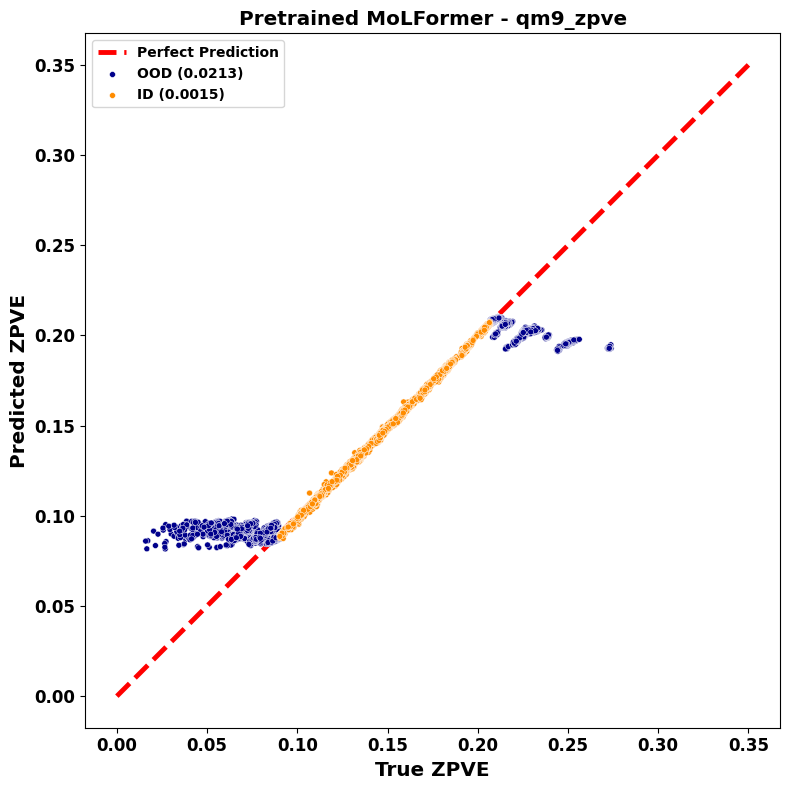

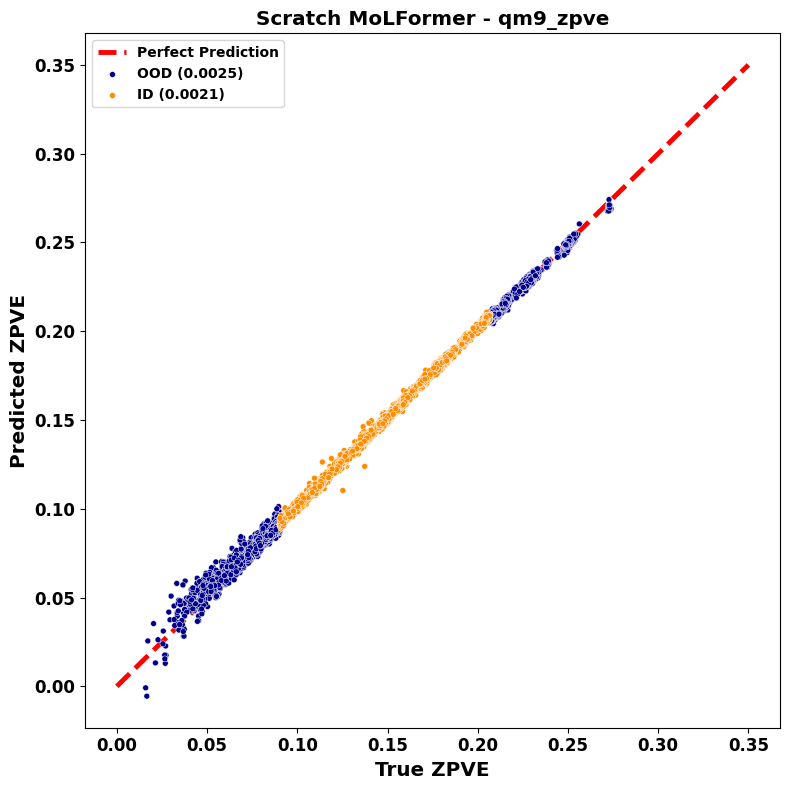

In [13]:
plot_results_molformer('10k_dft_density',DensityOODParityPlot,is_pretrained=True)
plot_results_molformer('10k_dft_density',DensityOODParityPlot,is_pretrained=False)
plot_results_molformer('10k_dft_hof',HoFOODParityPlot,is_pretrained=True)
plot_results_molformer('10k_dft_hof',HoFOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_alpha',AlphaOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_alpha',AlphaOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_cv',CvOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_cv',CvOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_gap',GapOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_gap',GapOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_homo',HomoOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_homo',HomoOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_lumo',LumoOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_lumo',LumoOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_mu',MuOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_mu',MuOODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_r2',R2OODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_r2',R2OODParityPlot,is_pretrained=False)
plot_results_molformer('qm9_zpve',ZpveOODParityPlot,is_pretrained=True)
plot_results_molformer('qm9_zpve',ZpveOODParityPlot,is_pretrained=False)